In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas
from sklearn import preprocessing

In [2]:
raw_Data = pandas.read_csv("iris.data")
raw_Data.iloc[:5, :]


,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#Prepare Data

label = raw_Data['class']

encoder = preprocessing.LabelEncoder()
encoder.fit(np.unique(label))
Y = encoder.transform(pandas.Series(label))
Y = Y.reshape(Y.shape[0], 1)

X = raw_Data.loc[:, :'petal width']
Data = np.append(X, Y, axis=1)

In [4]:
K = 3
X = np.array(X).reshape(150, 4)
sample_size, feature_size = X.shape
Theta = np.zeros((K, feature_size))

def softmax(X, Theta, K):
    sample_size, feature_size = X.shape
    Z = X.dot(Theta.transpose())
    exp_Z = np.exp(Z)
    sum_Z = (1 / np.sum(exp_Z, axis=1)).reshape(150, 1)
    prob = sum_Z * exp_Z
    return prob    

In [5]:
def cost_function(X, Y, Theta, K):
    cost = 0
    Prob = softmax(X, Theta, K)
    for i in xrange(K):
        cost += np.sum(np.array(Y == i, dtype=int) * np.log(Prob)[:, i].reshape(150, 1))
    cost = -(1 / float(sample_size)) * cost
    return cost

In [6]:

cost_function(X, Y, Theta, K)

1.0986122886681098

In [7]:
def gradient_descent(X, Y, T, learning_rate, iterate, K):
    sample_size, feature_size = X.shape
    Theta = T.copy()
    cost_history = []
    for j in xrange(iterate):
        Prob = softmax(X, Theta, K)
        update_value = []
        for i in xrange(K):
            update_value.append(learning_rate * -(1 / float(sample_size)) * np.sum(X * (np.array(Y == i, dtype=int) - np.log(Prob)[:, i].reshape(150, 1)), axis = 0))
        Theta -= update_value
        cost_history.append(cost_function(X, Y, Theta, K))
    return Theta, cost_history
    

[[ 43.22786588  22.82215967  27.3939881    8.70318437]
 [ 43.22523173  22.47483286  27.68177927   8.6879657 ]
 [ 43.03728378  22.62048532  27.76548189   8.98717351]]
0.815031151321


<IPython.core.display.Javascript object>


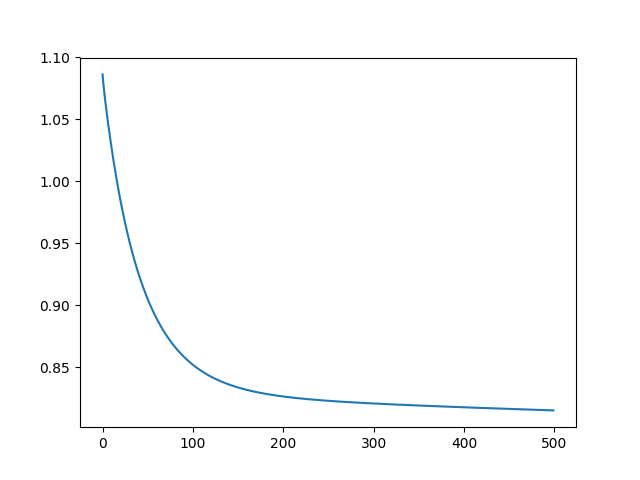

In [8]:
New_Theta, cost_history = gradient_descent(X, Y, Theta, 0.01, 500, K)
print New_Theta
print cost_function(X, Y, New_Theta, K)
plt.figure(1)
plt.plot(cost_history)

In [9]:
Y_ = np.argmax(softmax(X, New_Theta, K), axis=1).reshape(150, 1)

<IPython.core.display.Javascript object>


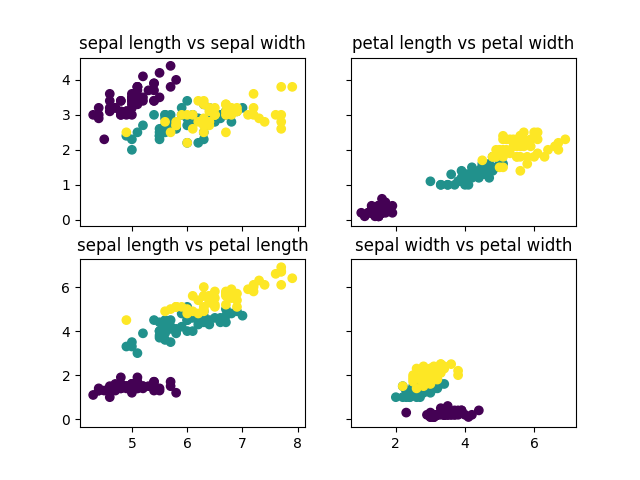

In [10]:
plot, plt_area= plt.subplots(2, 2, sharex='col', sharey='row')

plt_area[0, 0].set_title("sepal length vs sepal width")
plt_area[0, 0].scatter(raw_Data['sepal length'], raw_Data['sepal width'], c = Y)

plt_area[0, 1].set_title("petal length vs petal width")
plt_area[0, 1].scatter(raw_Data['petal length'], raw_Data['petal width'], c = Y)

plt_area[1, 0].set_title("sepal length vs petal length")
plt_area[1, 0].scatter(raw_Data['sepal length'], raw_Data['petal length'], c = Y)

plt_area[1, 1].set_title("sepal width vs petal width")
plt_area[1, 1].scatter(raw_Data['sepal width'], raw_Data['petal width'], c = Y)

<IPython.core.display.Javascript object>


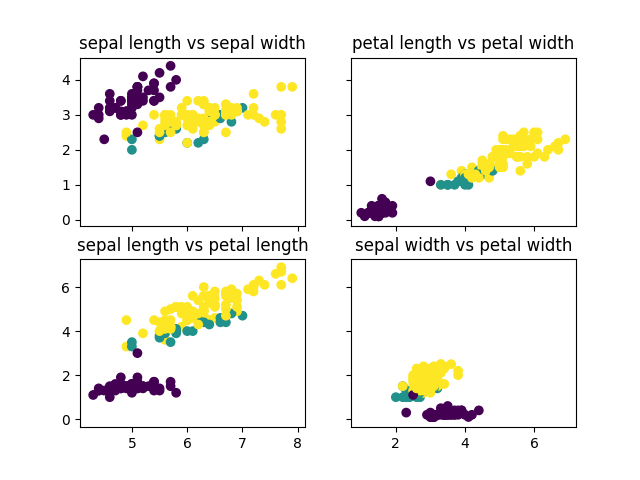

In [11]:
plot, plt_area= plt.subplots(2, 2, sharex='col', sharey='row')

plt_area[0, 0].set_title("sepal length vs sepal width")
plt_area[0, 0].scatter(raw_Data['sepal length'], raw_Data['sepal width'], c = Y_)

plt_area[0, 1].set_title("petal length vs petal width")
plt_area[0, 1].scatter(raw_Data['petal length'], raw_Data['petal width'], c = Y_)

plt_area[1, 0].set_title("sepal length vs petal length")
plt_area[1, 0].scatter(raw_Data['sepal length'], raw_Data['petal length'], c = Y_)

plt_area[1, 1].set_title("sepal width vs petal width")
plt_area[1, 1].scatter(raw_Data['sepal width'], raw_Data['petal width'], c = Y_)

# Reference

http://ufldl.stanford.edu/wiki/index.php/Softmax_Regression